In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import seaborn as sns

In [ ]:
df = pd.read_csv(r'C:\Users\sriji\Applied_ML\NLP\Resume_dataset_kaggle\UpdatedResumeDataSet.csv')

In [121]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [122]:
df.shape

(962, 2)

In [123]:
df['Category'].unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23])

In [82]:
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Blockchain                   40
ETL Developer                40
Operations Manager           40
Data Science                 40
Sales                        40
Mechanical Engineer          40
Arts                         36
Database                     33
Electrical Engineering       30
Health and fitness           30
PMO                          30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
SAP Developer                24
Civil Engineer               24
Advocate                     20
Name: count, dtype: int64

C:\Users\sriji\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Figure size 5000x2000 with 0 Axes>

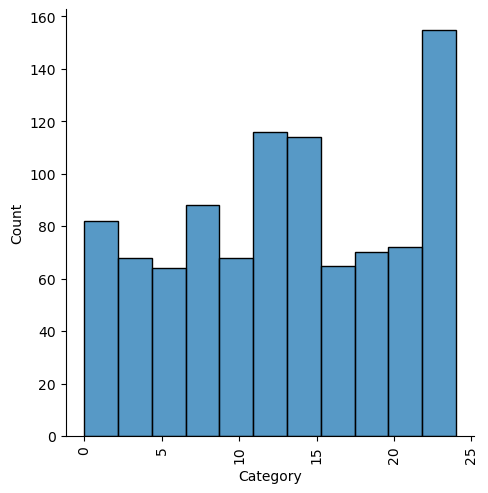

In [124]:
plt.figure(figsize=(50,20))
sns.displot(df, x = 'Category')
plt.xticks(rotation=90)
plt.show()

In [125]:
lables = df['Category'].unique()
counts = df['Category'].value_counts()

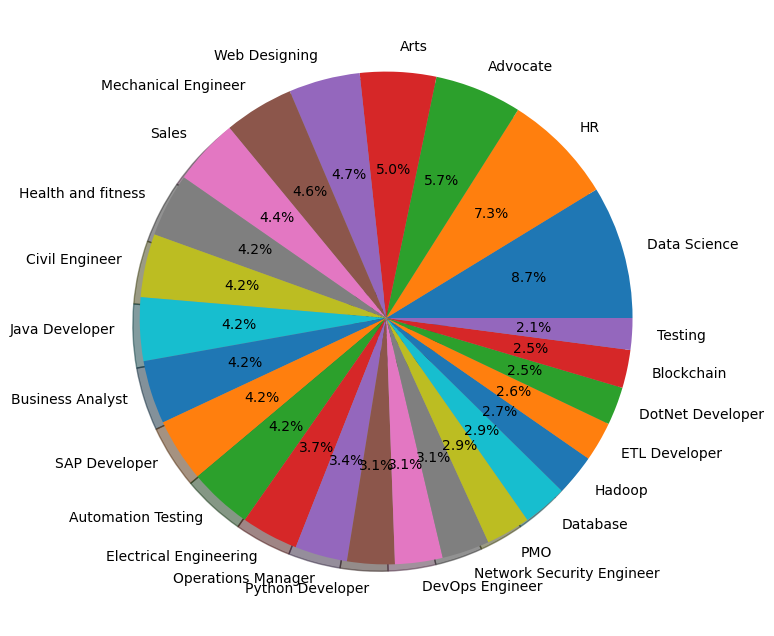

In [85]:
plt.figure(figsize = (15,8))
plt.pie(counts, labels = lables, autopct = '%1.1f%%', shadow = True )
plt.show()

Exploring Resume

In [126]:
df['Resume']

0      Skills Programming Languages Python pandas num...
1      Education Details May 2013 to May 2017 B E UIT...
2      Areas of Interest Deep Learning Control System...
3      Skills R Python SAP HANA Tableau SAP HANA SQL ...
4      Education Details MCA YMCAUST Faridabad Haryan...
                             ...                        
957    Computer Skills Proficient in MS office Word B...
958     Willingness to aept the challenges Positive t...
959    PERSONAL SKILLS Quick learner Eagerness to lea...
960    COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...
961    Skill Set OS Windows XP 7 8 8 1 10 Database MY...
Name: Resume, Length: 962, dtype: object

Cleaning Data

In [34]:
#import regex

In [127]:
import re

In [128]:
def CleanResume(txt):
    cleanTxt = re.sub('http\S+\s',' ',txt) #remove any links
    cleanTxt = re.sub('RT|cc','',cleanTxt) #RT and cc are not relevant
    cleanTxt = re.sub('@\S+',' ',cleanTxt) #http and attached words
    cleanTxt = re.sub('#\S+',' ',cleanTxt) #remove #words
    cleanTxt = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""),' ',cleanTxt)
    cleanTxt = re.sub(r'[^\x00-\x7f]',' ',cleanTxt)
    cleanTxt = re.sub('\s+',' ',cleanTxt)
    
    
   
    
    return cleanTxt



In [129]:
txt = "my ### website is http://srj43 and @gmail.com"

In [130]:
CleanResume(txt)

'my website is and '

In [131]:
df['Resume'] = df['Resume'].apply(lambda x:CleanResume(x))

In [132]:
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in aelerating the r

In [133]:
df['Category']

0       6
1       6
2       6
3       6
4       6
       ..
957    23
958    23
959    23
960    23
961    23
Name: Category, Length: 962, dtype: int32

In [134]:
#words to categorical value

In [135]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [136]:
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [137]:
df.head()

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...


In [138]:
df.Category.unique()

array([ 6, 12,  0,  1, 24, 16, 22, 14,  5, 15,  4, 21,  2, 11, 18, 20,  8,
       17, 19,  7, 13, 10,  9,  3, 23], dtype=int64)

In [ ]:
#array(['Data Science', 'HR', 'Advocate', 'Arts', 'Web Designing',
#       'Mechanical Engineer', 'Sales', 'Health and fitness',
#       'Civil Engineer', 'Java Developer', 'Business Analyst',
#       'SAP Developer', 'Automation Testing', 'Electrical Engineering',
#       'Operations Manager', 'Python Developer', 'DevOps Engineer',
#       'Network Security Engineer', 'PMO', 'Database', 'Hadoop',
#       'ETL Developer', 'DotNet Developer', 'Blockchain', 'Testing'],
#      dtype=object)

Above we can map the profile with number

Vectorization

In [139]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [140]:
tfidf = TfidfVectorizer(stop_words = 'english')

In [141]:
tfidf.fit(df['Resume'])
reqd_text = tfidf.transform(df['Resume'])

In [102]:
df

,Category,Resume
0,6,Skills Programming Languages Python pandas num...
1,6,Education Details May 2013 to May 2017 B E UIT...
2,6,Areas of Interest Deep Learning Control System...
3,6,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,6,Education Details MCA YMCAUST Faridabad Haryan...
...,...,...
957,23,Computer Skills Proficient in MS office Word B...
958,23,Willingness to aept the challenges Positive t...
959,23,PERSONAL SKILLS Quick learner Eagerness to lea...
960,23,COMPUTER SKILLS SOFTWARE KNOWLEDGE MS Power Po...


Splitting

In [142]:
from sklearn.model_selection import train_test_split

In [143]:
X_train, X_test, y_train, y_test = train_test_split(reqd_text, df['Category'], random_state = 42, test_size=0.2)

In [144]:
from sklearn.neighbors import KNeighborsClassifier


clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [145]:
ypred = clf.predict(X_test)

In [146]:
print(ypred)

[15 15 15 13 14 17 16  2  0 14 13 12 16 23 20  5  6  4 10  9 19  1 10 23
 23 21 22 22  2 12 18  1  8 24 11 23  7 12 24  8 18  6  8 19 24 23 21  1
 15  4 15 22 11  5 15 13  1 19  5 12 22 22 20 24 21 18 12 10 10 20 10  8
  9 21 17 21  0 17 16 14 15 11 11  8 20  3 19  8  0  2  9 10  2 23 20 20
 23 12 18 12  7 16  8 14 18  3 14 19 14 14 15 18  8  2 21 18 23 10 23  5
 11 15 12  3  5  3  7 12 19  8 20 19  3 15  9 19  1 23 21  5 20 15 16  7
  7  8 15 18  1 15 13 20  7  4 18 11  5 15  5 12  9 22 18 21  8 23  4 12
 24 16 15 22  8 22  3 16 23 23 12  7 16 18  5  3 18  8 23 23 20 21  6  7
 23]


In [147]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score

In [148]:
clf1 = OneVsRestClassifier(KNeighborsClassifier())

In [149]:
clf1.fit(X_train, y_train)

OneVsRestClassifier(estimator=KNeighborsClassifier())

In [150]:
ypred = clf1.predict(X_test)

In [151]:
print(accuracy_score(y_test, ypred ))

0.9844559585492227


Prediction System

In [152]:
myresume = """ I am a data scientist specilaizing in machine learning algorithms and NLP procedures. I have worked for 
PwC and Deloitte where I have worked on databases, sentiment analysis and other artificial intelligence based work. I am proficient in SQL
Python and Databases
"""

In [153]:
import pickle

In [154]:
pickle.dump(tfidf, open('tfidf.pkl','wb'))
pickle.dump(clf1, open('clf.pkl','wb'))

In [155]:
classifier = pickle.load(open('clf.pkl','rb'))

In [156]:
#clean resume

In [158]:
cleaned_resume = CleanResume(myresume)

In [159]:
#transform cleaned resume using tfidf

In [160]:
input_features = tfidf.transform([cleaned_resume])

In [161]:
#make prediction using trained classifier
prediction_id = classifier.predict(input_features)[0]

In [162]:
#map category to a job role

In [163]:
category_mapping = {
    15:"Java Developer",
    23:"Testing",
    6:"Data Science",
    8:"DevOps Engineer",
    12:"HR",
    13:"Hadoop",
    3:"Blockchain",
    10:"ETL Developer",
    18:"Operation Manager",
    22:"Sales Professional",
    16:"Mechanical Engineer",
    1:"Arts",
    7:"DBA",
    11:"Electrical Engineer",
    14:"Health and Fitness",
    19:"Product Manager",
    4:"Business Analyst",
    9:"DotNet Developer",
    2:'Automation Testing',
    17:"Network Security Engineer",
    21:"SAP Developer",
    5:"Civil Engineer",
    0:"Advocate",
    23:"Testing",
    20:"Python Developer",
    24:"Web Designer"
    
    
}

In [164]:
category_name = category_mapping.get(prediction_id,"Unknown")

In [165]:
print("Predicted Category:",category_name)
print(prediction_id)

Predicted Category: Data Science
6
